In [1]:
# This notebook performs initial data exploration and visualization of the BraTS 2025 dataset.
# We visualize multiple MRI modalities (t1n, t1c, t2w, t2f) and segmentation labels to understand structure and volume layout.

THE TRAINING DATASET
BraTS2025-GLI-PRE-Challenge-TrainingData

In [ ]:
import os
import sys
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as npa
import glob

# Set inline plotting
%matplotlib inline

In [8]:
# Define path to training data
BRATS_TRAIN_PATH = Path(r"C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS2025-GLI-PRE-Challenge-TrainingData")

# We confirm contents of root path
print("Root contains:", list(BRATS_TRAIN_PATH.iterdir()))

Root contains: [WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS-GLI-00000-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS-GLI-00002-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS-GLI-00003-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS-GLI-00005-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS-GLI-00006-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS2025-GLI-PRE-Challenge-TrainingData/BraTS-GLI-00008-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-

In [89]:
# List all patient directories
patients = sorted(BRATS_TRAIN_PATH.glob("BraTS-GLI-*"))
print(f"Found {len(patients)} patient folders")

Found 1251 patient folders


In [90]:
# Show first 5 patient folder names
for p in patients[:1251]:
    print(p.name)

BraTS-GLI-00000-000
BraTS-GLI-00002-000
BraTS-GLI-00003-000
BraTS-GLI-00005-000
BraTS-GLI-00006-000
BraTS-GLI-00008-000
BraTS-GLI-00008-001
BraTS-GLI-00009-000
BraTS-GLI-00009-001
BraTS-GLI-00011-000
BraTS-GLI-00012-000
BraTS-GLI-00014-000
BraTS-GLI-00014-001
BraTS-GLI-00016-000
BraTS-GLI-00016-001
BraTS-GLI-00017-000
BraTS-GLI-00017-001
BraTS-GLI-00018-000
BraTS-GLI-00019-000
BraTS-GLI-00020-000
BraTS-GLI-00020-001
BraTS-GLI-00021-000
BraTS-GLI-00021-001
BraTS-GLI-00022-000
BraTS-GLI-00022-001
BraTS-GLI-00024-000
BraTS-GLI-00024-001
BraTS-GLI-00025-000
BraTS-GLI-00026-000
BraTS-GLI-00028-000
BraTS-GLI-00030-000
BraTS-GLI-00031-000
BraTS-GLI-00031-001
BraTS-GLI-00032-000
BraTS-GLI-00032-001
BraTS-GLI-00033-000
BraTS-GLI-00035-000
BraTS-GLI-00036-000
BraTS-GLI-00036-001
BraTS-GLI-00043-000
BraTS-GLI-00044-000
BraTS-GLI-00045-000
BraTS-GLI-00045-001
BraTS-GLI-00046-000
BraTS-GLI-00048-000
BraTS-GLI-00048-001
BraTS-GLI-00049-000
BraTS-GLI-00051-000
BraTS-GLI-00052-000
BraTS-GLI-00053-000


In [91]:
# Select a patient
example_patient = patients[0]

# List modalities and segmentation
modalities = ["t1n", "t1c", "t2w", "t2f"]
images = {}
for mod in modalities:
    images[mod] = nib.load(str(example_patient / f"{example_patient.name}-{mod}.nii.gz")).get_fdata()

label = nib.load(str(example_patient / f"{example_patient.name}-seg.nii.gz")).get_fdata()

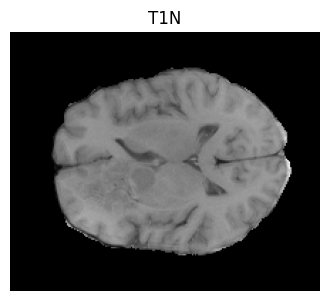

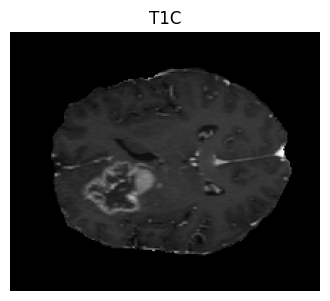

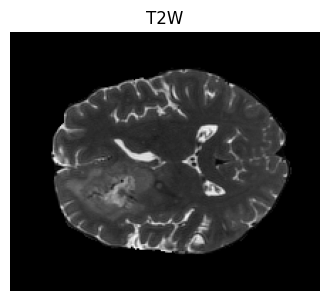

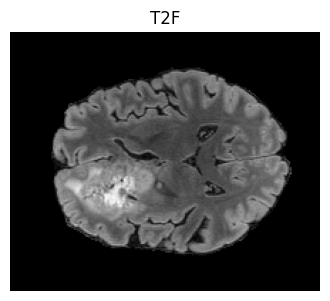

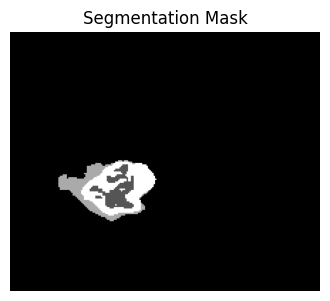

In [93]:
# Plot image slices 
def plot_slice(data, title, slice_idx=80):
    plt.figure(figsize=(4, 4))
    plt.imshow(data[:, :, slice_idx], cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
# Plot a few modalities
slice_idx = images['t1n'].shape[2] // 2
for mod in modalities:
    plot_slice(images[mod], title=mod.upper(), slice_idx=slice_idx)

# Plot segmentation
plot_slice(label, title="Segmentation Mask", slice_idx=slice_idx)


In [94]:
# Summarize statistics
print("Image shape:", images['t1n'].shape)
print("Unique label values:", np.unique(label))

Image shape: (182, 218, 182)
Unique label values: [0. 1. 2. 3.]


In [95]:
# Check if all files exist
missing = []
for patient in patients:
    for mod in modalities + ["seg"]:
        fname = patient / f"{patient.name}-{mod}.nii.gz"
        if not fname.exists():
            missing.append(str(fname))

if missing:
    print(f"Missing {len(missing)} files:")
    for f in missing[:10]:
        print("-", f)
else:
    print(" All modality and segmentation files found for all patients.")

 All modality and segmentation files found for all patients.


THE VALIDATION DATASET
BraTS2025-GLI-PRE-Challenge-ValidationData

In [9]:
# Define path to Validation data
BRATS_VALID_PATH = Path(r"C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS2025-GLI-PRE-Challenge-ValidationData")

# We confirm contents of root path
print("Root contains:", list(BRATS_VALID_PATH.iterdir()))

Root contains: [WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS-GLI-00001-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS-GLI-00001-001'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS-GLI-00013-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS-GLI-00013-001'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS-GLI-00015-000'), WindowsPath('C:/Users/user/NeuroSegNet/data/raw/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS2025-GLI-PRE-Challenge-ValidationData/BraTS-GLI-00015-001'), WindowsPath('C:/Users/user/NeuroSegNet/dat

In [10]:
# List all patient directories
patients = sorted(BRATS_VALID_PATH.glob("BraTS-GLI-*"))
print(f"Found {len(patients)} patient folders")

Found 219 patient folders


In [12]:
# Show first 5 patient folder names
for p in patients[:219]:
    print(p.name)

BraTS-GLI-00001-000
BraTS-GLI-00001-001
BraTS-GLI-00013-000
BraTS-GLI-00013-001
BraTS-GLI-00015-000
BraTS-GLI-00015-001
BraTS-GLI-00027-000
BraTS-GLI-00037-000
BraTS-GLI-00047-000
BraTS-GLI-00079-000
BraTS-GLI-00080-000
BraTS-GLI-00080-001
BraTS-GLI-00082-000
BraTS-GLI-00091-000
BraTS-GLI-00114-000
BraTS-GLI-00119-000
BraTS-GLI-00125-000
BraTS-GLI-00129-000
BraTS-GLI-00135-000
BraTS-GLI-00141-000
BraTS-GLI-00145-000
BraTS-GLI-00153-000
BraTS-GLI-00161-000
BraTS-GLI-00163-000
BraTS-GLI-00174-000
BraTS-GLI-00181-000
BraTS-GLI-00182-000
BraTS-GLI-00190-000
BraTS-GLI-00200-000
BraTS-GLI-00208-000
BraTS-GLI-00213-000
BraTS-GLI-00229-000
BraTS-GLI-00252-000
BraTS-GLI-00256-000
BraTS-GLI-00264-000
BraTS-GLI-00287-000
BraTS-GLI-00307-000
BraTS-GLI-00323-000
BraTS-GLI-00333-000
BraTS-GLI-00335-000
BraTS-GLI-00337-000
BraTS-GLI-00355-000
BraTS-GLI-00372-000
BraTS-GLI-00381-000
BraTS-GLI-00384-000
BraTS-GLI-00422-000
BraTS-GLI-00428-000
BraTS-GLI-00434-000
BraTS-GLI-00438-000
BraTS-GLI-00447-000


In [ ]:
# Select a patient
example_patient = patients[0]

# List modalities and segmentation
modalities = ["t1n", "t1c", "t2w", "t2f"]
images = {}
for mod in modalities:
    images[mod] = nib.load(str(example_patient / f"{example_patient.name}-{mod}.nii.gz")).get_fdata()

# Note the validation cases have no "-seg.nii.gz" files or ground truth files as found in the training data.

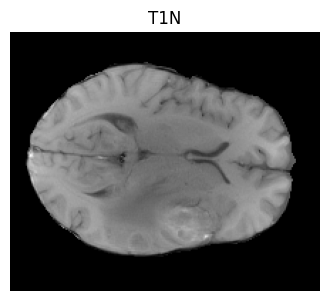

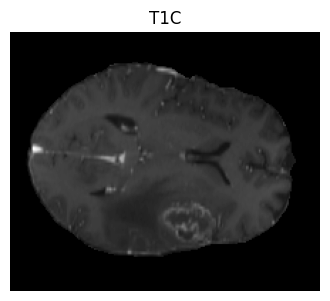

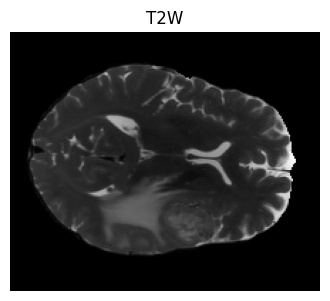

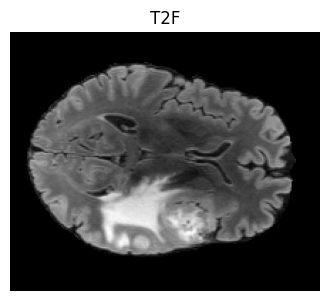

In [16]:
# Plot image slices 
def plot_slice(data, title, slice_idx=80):
    plt.figure(figsize=(4, 4))
    plt.imshow(data[:, :, slice_idx], cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
# Plot a few modalities
slice_idx = images['t1n'].shape[2] // 2
for mod in modalities:
    plot_slice(images[mod], title=mod.upper(), slice_idx=slice_idx)


In [19]:
# Check if all files exist
missing = []
for patient in patients:
    for mod in modalities :
        fname = patient / f"{patient.name}-{mod}.nii.gz"
        if not fname.exists():
            missing.append(str(fname))

if missing:
    print(f"Missing {len(missing)} files:")
    for f in missing[:10]:
        print("-", f)
else:
    print(" All modality and segmentation files found for all patients.")

 All modality and segmentation files found for all patients.
